# Section 1
Edge Detection

In [ ]:
!gdown "1VTvvWRgcyb0LjOsQzUsydXa2hKQbs2Zc"

Downloading...
From: https://drive.google.com/uc?id=1VTvvWRgcyb0LjOsQzUsydXa2hKQbs2Zc
To: /content/lab 06 noisy_image.jpg
100% 107k/107k [00:00<00:00, 58.2MB/s]


Given an image with noise, use the following three algorithms for edge detection:

1. Sobel operator

2. Canny algorithm

3. Mar-hildreth algorithm

Display the results respectively.

***(Explaination answer)***

- Q1. Which algorithm is most sensitive to noise?

- Q2. In Canny and Mar-Hildreth algorithms, after the adjusting of kernel size and standard deviation of Gaussian blur, what changes can you observe in the edge detection results? How does Gaussian smoothing affect edge detection?

- Q3. Which algorithm do you think is best for processing high noise images?  Justify your answer.




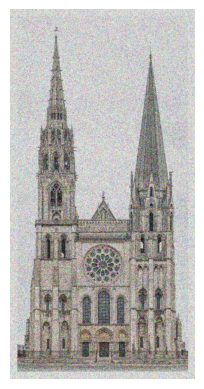

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
img= cv.imread('/content/lab 06 noisy_image.jpg')
plt.imshow(img[:,:,::-1])
plt.axis("off")
plt.show()

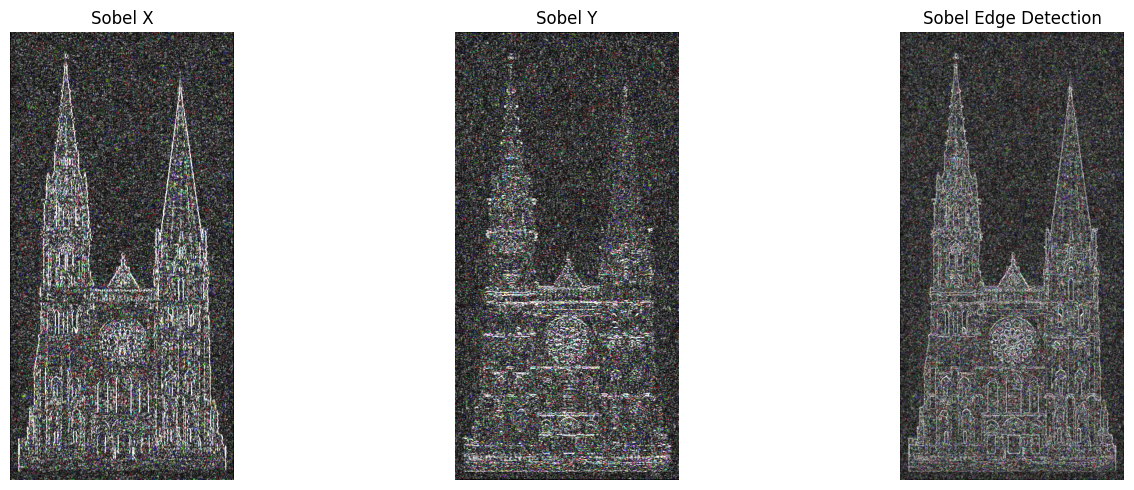

In [ ]:
# Answer your code here
# Step 2: Compute Sobel gradient results
x = cv.Sobel(img, cv.CV_16S, 1, 0)  # Horizontal gradient (dx=1, dy=0)
y = cv.Sobel(img, cv.CV_16S, 0, 1)  # Vertical gradient (dx=0, dy=1)


# Step 3: Convert data to uint8 format
Scale_absX = cv.convertScaleAbs(x)
Scale_absY = cv.convertScaleAbs(y)

# Step 4: Combine results
result = cv.addWeighted(Scale_absX, 0.5, Scale_absY, 0.5, 0)
# result=(255×0.5)+(255×0.5) =127.5+127.5=255

# Display the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Sobel X")
plt.imshow(Scale_absX, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Sobel Y")
plt.imshow(Scale_absY, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sobel Edge Detection")
plt.imshow(result, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

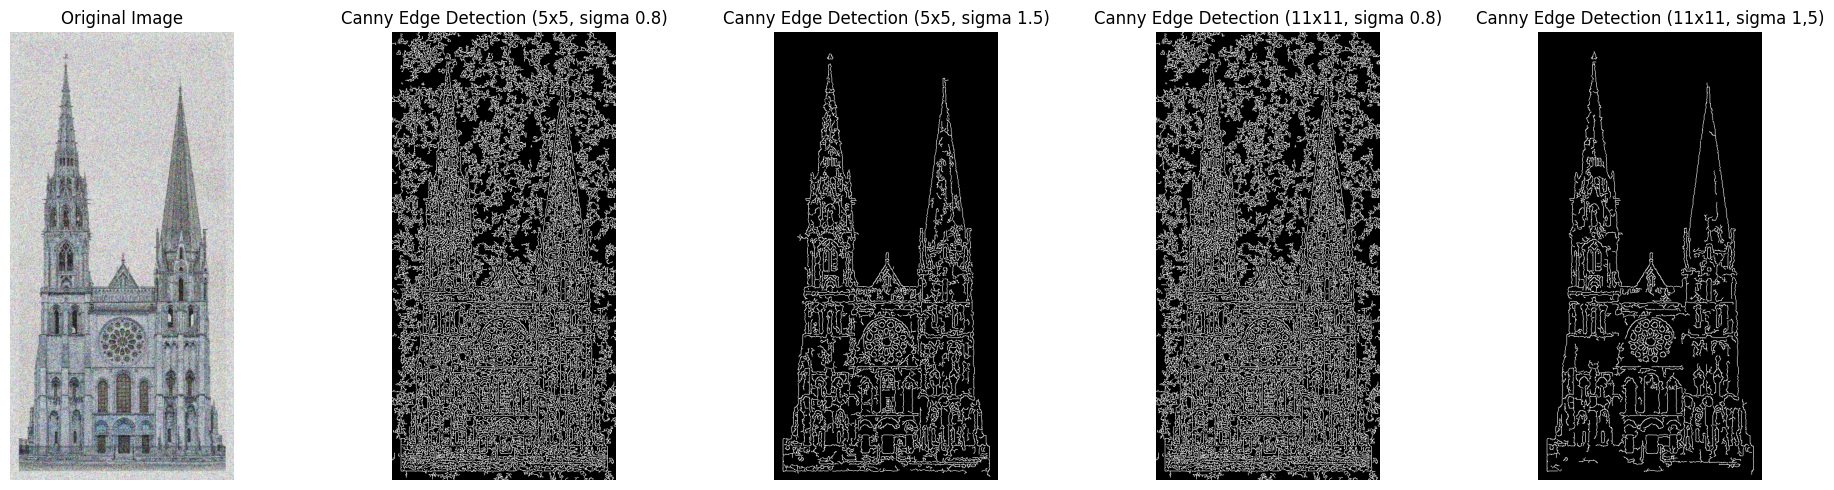

In [ ]:
lowThreshold = 50 # Set the lower threshold for edge detection
highThreshold = 150  # Set the upper threshold for edge detection

# Apply Canny edge detection

#  Default is 3x3 and Sobel is used for gradient computation

plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

filtered_img = cv.GaussianBlur(img, (5, 5), 0.8)
canny_result = cv.Canny(filtered_img, lowThreshold, highThreshold)

plt.subplot(1, 5, 2)
plt.title("Canny Edge Detection (5x5, sigma 0.8)")
plt.imshow(canny_result, cmap='gray')
plt.axis("off")

filtered_img = cv.GaussianBlur(img, (5, 5), 1.5)
canny_result = cv.Canny(filtered_img, lowThreshold, highThreshold)

plt.subplot(1, 5, 3)
plt.title("Canny Edge Detection (5x5, sigma 1.5)")
plt.imshow(canny_result, cmap='gray')
plt.axis("off")

filtered_img = cv.GaussianBlur(img, (11, 11), 0.8)
canny_result = cv.Canny(filtered_img, lowThreshold, highThreshold)

plt.subplot(1, 5, 4)
plt.title("Canny Edge Detection (11x11, sigma 0.8)")
plt.imshow(canny_result, cmap='gray')
plt.axis("off")

filtered_img = cv.GaussianBlur(img, (11, 11), 1.5)
canny_result = cv.Canny(filtered_img, lowThreshold, highThreshold)

plt.subplot(1, 5, 5)
plt.title("Canny Edge Detection (11x11, sigma 1,5)")
plt.imshow(canny_result, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

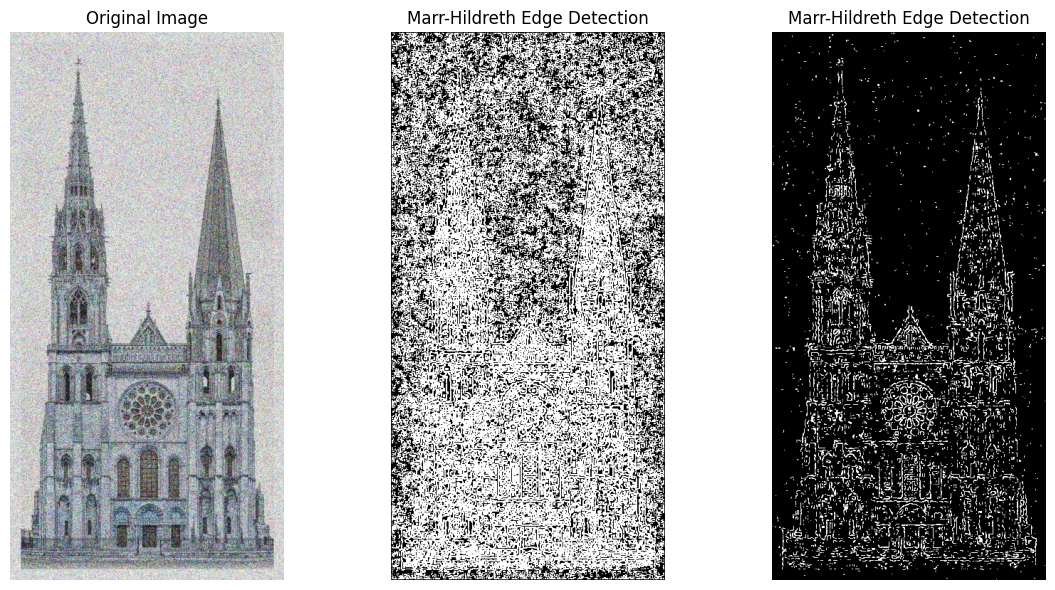

In [ ]:
# Step 2: Apply Gaussian filter (smoothing)
blurred = cv.GaussianBlur(img, (5, 5), 1.2)

# Step 3: Compute Laplacian of the smoothed image
laplacian = cv.Laplacian(blurred, cv.CV_64F)  # Use CV_64F to capture negative values

# Step 4: Detect Zero-Crossings with Thresholding
threshold = 5  # Set a threshold for significant edges
# A threshold is used to ignore small variations (caused by noise or minor gradients) and focus only on significant changes in the Laplacian values

zero_crossings = np.zeros_like(laplacian, dtype=np.uint8)
# A new matrix is created with the same shape as the laplacian result, initialized with zeros. This matrix will store the edges

rows, cols, ch = laplacian.shape

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        # Extract 3×3 Neighborhood
        patch = laplacian[i-1:i+2, j-1:j+2]  # 3x3 patch around the pixel
        # Check for Zero Crossing
        if (patch.min() < -threshold) and (patch.max() > threshold):  # Check zero-crossing with threshold
            zero_crossings[i, j] = 255  # If the above condition is true， mark as an edge

# Display the original image and Marr-Hildreth result
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

# Marr-Hildreth Edge Detection
plt.subplot(1, 3, 2)
plt.title("Marr-Hildreth Edge Detection")
plt.imshow(zero_crossings, cmap='gray')
plt.axis("off")


############################################################################################################
blurred = cv.GaussianBlur(img, (11, 11), 1.7)
laplacian = cv.Laplacian(blurred, cv.CV_64F)
threshold = 5
zero_crossings = np.zeros_like(laplacian, dtype=np.uint8)
rows, cols, ch = laplacian.shape

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        # Extract 3×3 Neighborhood
        patch = laplacian[i-1:i+2, j-1:j+2]  # 3x3 patch around the pixel
        # Check for Zero Crossing
        if (patch.min() < -threshold) and (patch.max() > threshold):  # Check zero-crossing with threshold
            zero_crossings[i, j] = 255  # If the above condition is true， mark as an edge


plt.subplot(1, 3, 3)
plt.title("Marr-Hildreth Edge Detection")
plt.imshow(zero_crossings, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# Q1. Which algorithm is most sensitive to noise?
# ANS: Marr-Hildreth Edge Detection

# Q2. In Canny and Mar-Hildreth algorithms, after the adjusting of kernel size and standard deviation of Gaussian blur, what changes can you observe in the edge detection results? How does Gaussian smoothing affect edge detection?
# ANS: Clear edges show up when kernel size and sigma change to more number.

# Q3. Which algorithm do you think is best for processing high noise images? Justify your answer.
# Canny algorithm because following the result, Canny algorithm show clear edge and less noise more than other algorithm.

# Section 2


In [ ]:
!gdown "1QAG2i9RVuArct8JseVD0Oq8Hsxz3spRd"

Downloading...
From: https://drive.google.com/uc?id=1QAG2i9RVuArct8JseVD0Oq8Hsxz3spRd
To: /content/lab 06 church.jpg
100% 209k/209k [00:00<00:00, 37.8MB/s]


Given an image, use the following three algorithms for edge detection:

1. Sobel operator

2. Canny algorithm

3. Mar-hildreth algorithm

Display the results respectively.

***(Explaination answer)***

- Q1. Which algorithm produces the most detailed edges?
- Q2. Which algorithm provides the most accurate and continuous edges? Justify your reasoning.
- Q3. Based on your observations, which algorithm do you think is the best for general image processing tasks?




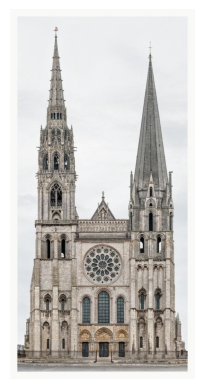

In [ ]:
img= cv.imread('/content/lab 06 church.jpg')
plt.imshow(img[:,:,::-1])
plt.axis("off")
plt.show()

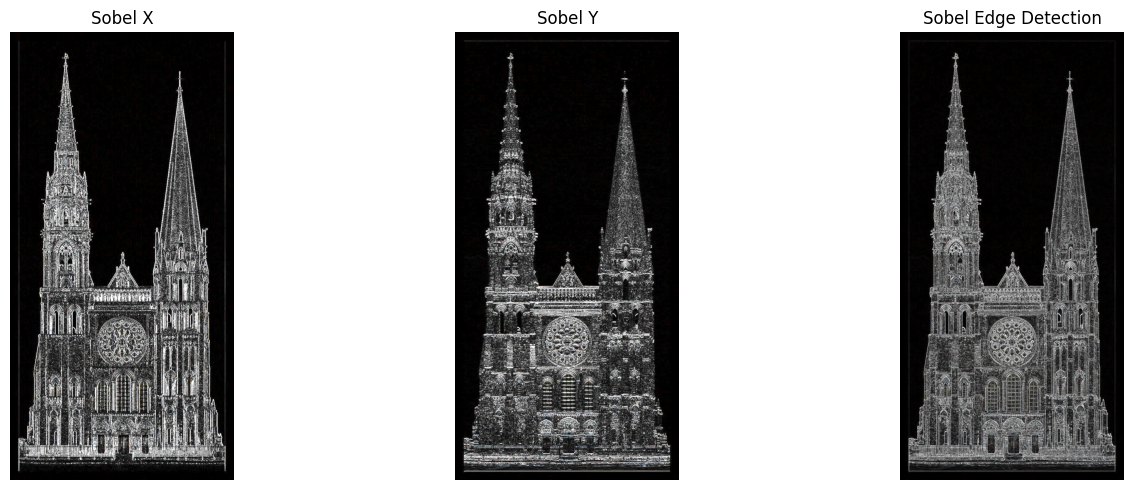

In [ ]:
# Answer your code here
# Step 2: Compute Sobel gradient results
x = cv.Sobel(img, cv.CV_16S, 1, 0)  # Horizontal gradient (dx=1, dy=0)
y = cv.Sobel(img, cv.CV_16S, 0, 1)  # Vertical gradient (dx=0, dy=1)


# Step 3: Convert data to uint8 format
Scale_absX = cv.convertScaleAbs(x)
Scale_absY = cv.convertScaleAbs(y)

# Step 4: Combine results
result = cv.addWeighted(Scale_absX, 0.5, Scale_absY, 0.5, 0)
# result=(255×0.5)+(255×0.5) =127.5+127.5=255

# Display the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Sobel X")
plt.imshow(Scale_absX, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Sobel Y")
plt.imshow(Scale_absY, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sobel Edge Detection")
plt.imshow(result, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

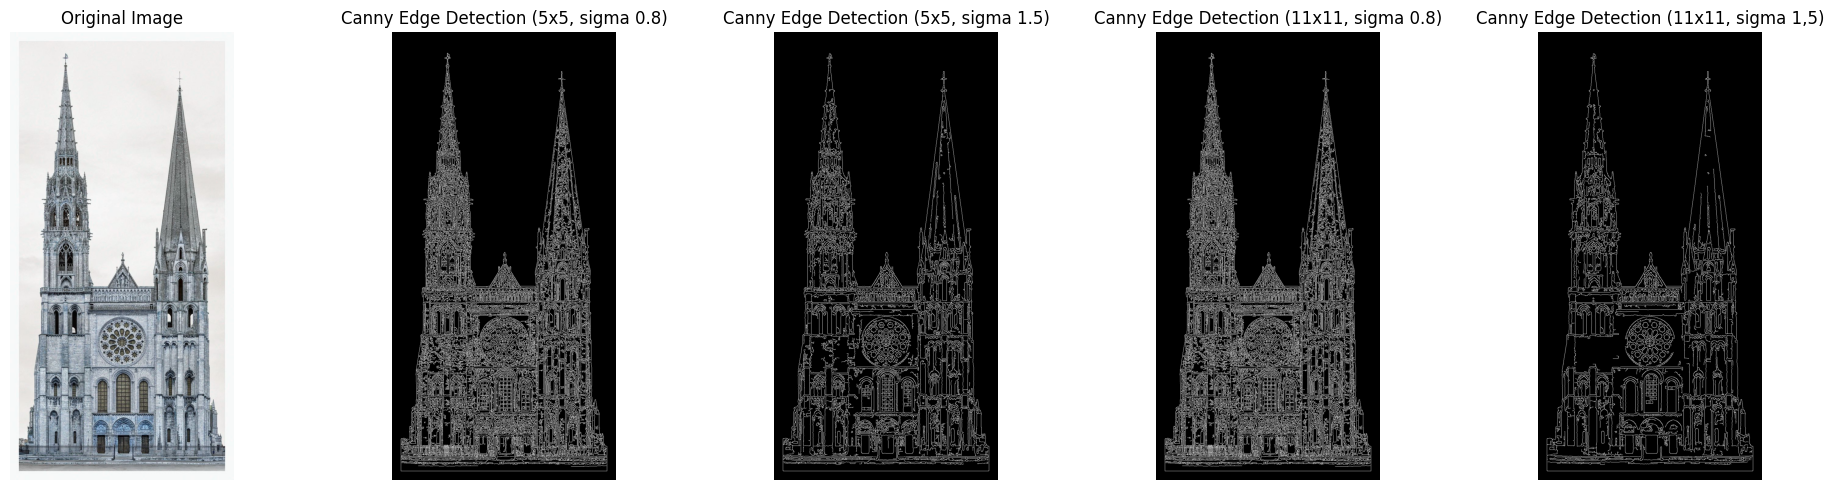

In [ ]:
lowThreshold = 50 # Set the lower threshold for edge detection
highThreshold = 150  # Set the upper threshold for edge detection

# Apply Canny edge detection

#  Default is 3x3 and Sobel is used for gradient computation

plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

filtered_img = cv.GaussianBlur(img, (5, 5), 0.8)
canny_result = cv.Canny(filtered_img, lowThreshold, highThreshold)

plt.subplot(1, 5, 2)
plt.title("Canny Edge Detection (5x5, sigma 0.8)")
plt.imshow(canny_result, cmap='gray')
plt.axis("off")

filtered_img = cv.GaussianBlur(img, (5, 5), 1.5)
canny_result = cv.Canny(filtered_img, lowThreshold, highThreshold)

plt.subplot(1, 5, 3)
plt.title("Canny Edge Detection (5x5, sigma 1.5)")
plt.imshow(canny_result, cmap='gray')
plt.axis("off")

filtered_img = cv.GaussianBlur(img, (11, 11), 0.8)
canny_result = cv.Canny(filtered_img, lowThreshold, highThreshold)

plt.subplot(1, 5, 4)
plt.title("Canny Edge Detection (11x11, sigma 0.8)")
plt.imshow(canny_result, cmap='gray')
plt.axis("off")

filtered_img = cv.GaussianBlur(img, (11, 11), 1.5)
canny_result = cv.Canny(filtered_img, lowThreshold, highThreshold)

plt.subplot(1, 5, 5)
plt.title("Canny Edge Detection (11x11, sigma 1,5)")
plt.imshow(canny_result, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

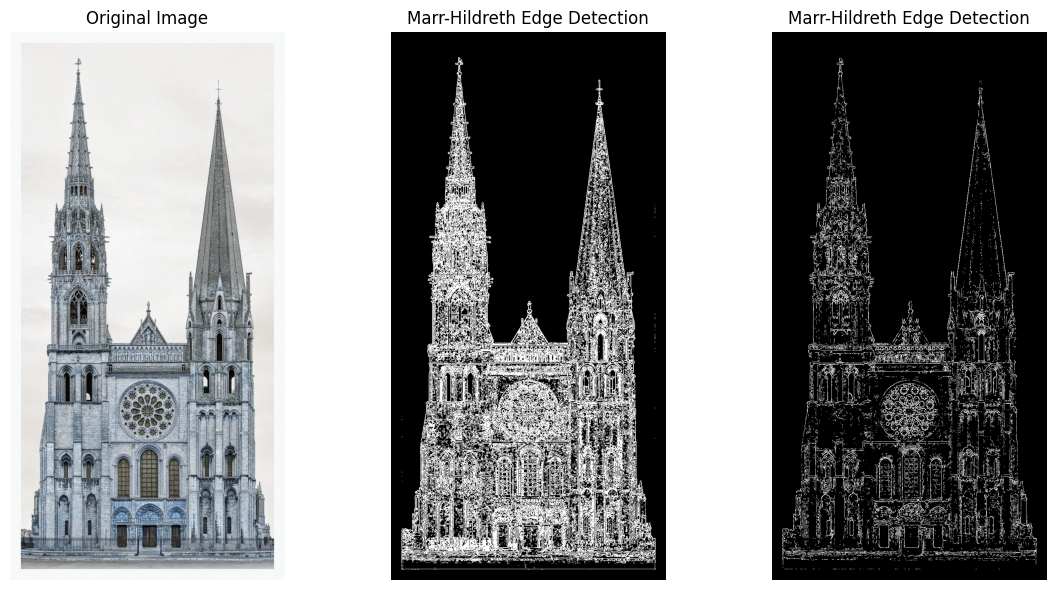

In [ ]:
# Step 2: Apply Gaussian filter (smoothing)
blurred = cv.GaussianBlur(img, (5, 5), 1.2)

# Step 3: Compute Laplacian of the smoothed image
laplacian = cv.Laplacian(blurred, cv.CV_64F)  # Use CV_64F to capture negative values

# Step 4: Detect Zero-Crossings with Thresholding
threshold = 5  # Set a threshold for significant edges
# A threshold is used to ignore small variations (caused by noise or minor gradients) and focus only on significant changes in the Laplacian values

zero_crossings = np.zeros_like(laplacian, dtype=np.uint8)
# A new matrix is created with the same shape as the laplacian result, initialized with zeros. This matrix will store the edges

rows, cols, ch = laplacian.shape

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        # Extract 3×3 Neighborhood
        patch = laplacian[i-1:i+2, j-1:j+2]  # 3x3 patch around the pixel
        # Check for Zero Crossing
        if (patch.min() < -threshold) and (patch.max() > threshold):  # Check zero-crossing with threshold
            zero_crossings[i, j] = 255  # If the above condition is true， mark as an edge

# Display the original image and Marr-Hildreth result
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

# Marr-Hildreth Edge Detection
plt.subplot(1, 3, 2)
plt.title("Marr-Hildreth Edge Detection")
plt.imshow(zero_crossings, cmap='gray')
plt.axis("off")


############################################################################################################
blurred = cv.GaussianBlur(img, (11, 11), 1.7)
laplacian = cv.Laplacian(blurred, cv.CV_64F)
threshold = 5
zero_crossings = np.zeros_like(laplacian, dtype=np.uint8)
rows, cols, ch = laplacian.shape

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        # Extract 3×3 Neighborhood
        patch = laplacian[i-1:i+2, j-1:j+2]  # 3x3 patch around the pixel
        # Check for Zero Crossing
        if (patch.min() < -threshold) and (patch.max() > threshold):  # Check zero-crossing with threshold
            zero_crossings[i, j] = 255  # If the above condition is true， mark as an edge


plt.subplot(1, 3, 3)
plt.title("Marr-Hildreth Edge Detection")
plt.imshow(zero_crossings, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# Q1. Which algorithm produces the most detailed edges?
#ANS: Canny algorithm

# Q2. Which algorithm provides the most accurate and continuous edges? Justify your reasoning.
#ANS: Canny algorithm. Unlike another algorithm, Canny algorithm show very very clear edge.

# Q3. Based on your observations, which algorithm do you think is the best for general image processing tasks?
#ANS: Canny algorithm

# Section 3

**Lane Detection**

Lane detection is one of the basic concepts when trying to understand how self-driving cars work.Hough transform can help to detect straight lines in the region of interest.

**Q1 : In this section you will deal with 2 image of lane data and try to show result of lane detection.**

**Tools**
* Edge Detection Ex. Canny.
* Line Detection Ex. Hough Transform Technique.
* Other tools you can also use to apply in your code.

> This is 2 image data for using in your code of this section.



In [ ]:
# Road1 gray-scale image (name:lane.jpg)
!gdown "1Y4ihYnHmxBKSK5SZKFrdKLW_-hGGSvFZ"

Downloading...
From: https://drive.google.com/uc?id=1Y4ihYnHmxBKSK5SZKFrdKLW_-hGGSvFZ
To: /content/lane.jpg
100% 35.2k/35.2k [00:00<00:00, 66.8MB/s]


In [ ]:
# Road2 color image (name:lane2.jpg)
!gdown "1BWa86A6oSJTXOFPiTzb0g2KvCbBcqeuF"

Downloading...
From: https://drive.google.com/uc?id=1BWa86A6oSJTXOFPiTzb0g2KvCbBcqeuF
To: /content/lane2.jpg
100% 776k/776k [00:00<00:00, 9.71MB/s]


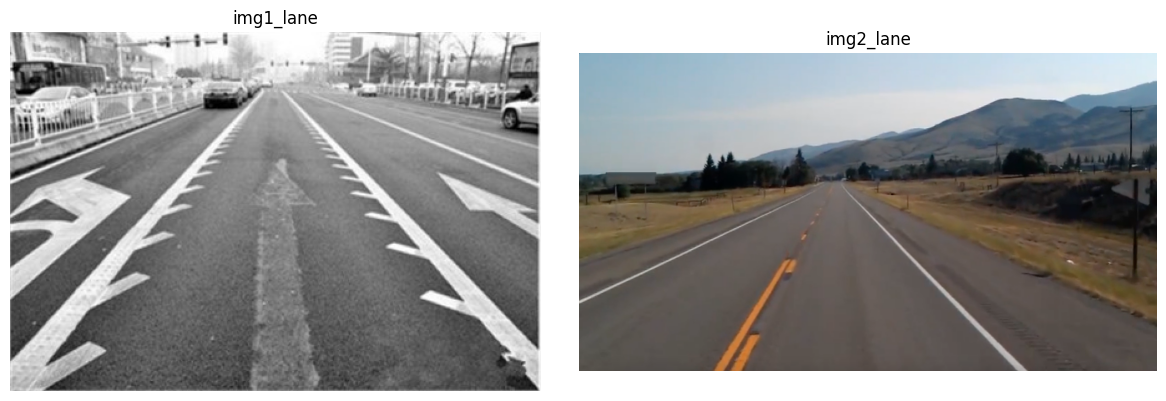

In [ ]:
img1_lane= cv.imread('/content/lane.jpg')
img2_lane= cv.imread('/content/lane2.jpg')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(img1_lane[:,:,::-1], cmap='brg', vmin=0, vmax=1)
plt.title('img1_lane')
plt.axis('off')

# Step 9: results of dest diliated
plt.subplot(1, 2, 2)
plt.imshow(img2_lane[:,:,::-1], cmap='brg', vmin=0, vmax=1)
plt.title('img2_lane')
plt.axis('off')

plt.tight_layout()
plt.show()


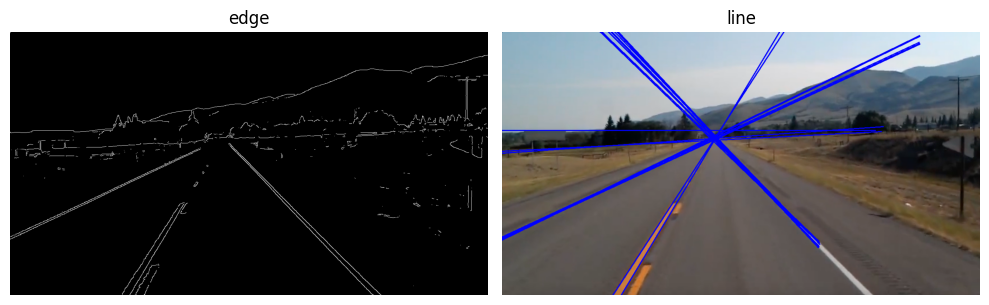

In [101]:
#Add your code here!
img2_lane_rgb = cv.cvtColor(img2_lane, cv.COLOR_BGR2RGB)
img2_lane_gray = cv.cvtColor(img2_lane, cv.COLOR_BGR2GRAY)

edges = cv.Canny(img2_lane_gray, threshold1=100, threshold2=100, apertureSize=3)
lines = cv.HoughLines(edges, rho=1, theta=np.pi/180, threshold=120)

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv.line(img2_lane_rgb, (x1, y1), (x2, y2), (0, 0, 255), 2)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(edges, cmap="gray")
plt.title('edge')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_lane_rgb)
plt.title('line')
plt.axis('off')

plt.tight_layout()
plt.show()

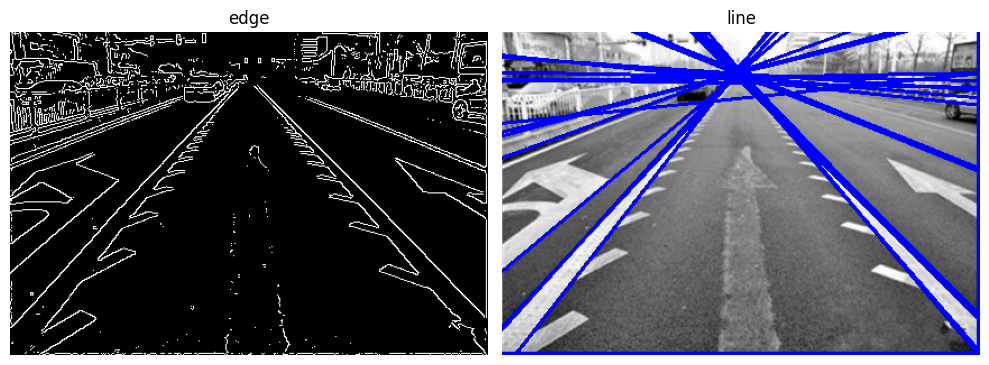

In [95]:
#Add your code here!
img1_lane_rgb = cv.cvtColor(img1_lane, cv.COLOR_BGR2RGB)
img1_lane_gray = cv.cvtColor(img1_lane, cv.COLOR_BGR2GRAY)

edges = cv.Canny(img1_lane_gray, threshold1=200, threshold2=200, apertureSize=3)
lines = cv.HoughLines(edges, rho=1, theta=np.pi/180, threshold=120)

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv.line(img1_lane_rgb, (x1, y1), (x2, y2), (0, 0, 255), 2)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(edges, cmap="gray")
plt.title('edge')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img1_lane_rgb)
plt.title('line')
plt.axis('off')

plt.tight_layout()
plt.show()

**Q2 : How are these two images from the lane dataset obstacles for you when implementing the code to detect lane results?**

***(Explaination answer)***

Ans. For the first time, it shows many lines that too much for lane detection. So I try to adjust some threshold value of Canny algorithhm to find the best look.